# Visualizing the mouse behavior

In [1]:
import sys
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sys
import os
%matplotlib inline 

## load in csv files (from running exportTrials.m)

### Mouse data

In [94]:
data90 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/full_9010_02192017.csv',index_col=0)
data80 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/full_8020_02192017.csv',index_col=0)
data70 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/full_7030_02192017.csv',index_col=0)

### HMM data

In [84]:
data90 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/hmm_matrix_full_9010.csv',index_col=0)
data80 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/hmm_matrix_full_8020.csv',index_col=0)
data70 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/hmm_matrix_full_7030.csv',index_col=0)

In [95]:
data90['Condition'] = '90-10'
data80['Condition'] = '80-20'
data70['Condition'] = '70-30'

In [96]:
data = data90.append(data80)
data = data.append(data70)

In [97]:
data.shape

(77487, 51)

# Compare prevalance of switches following reward

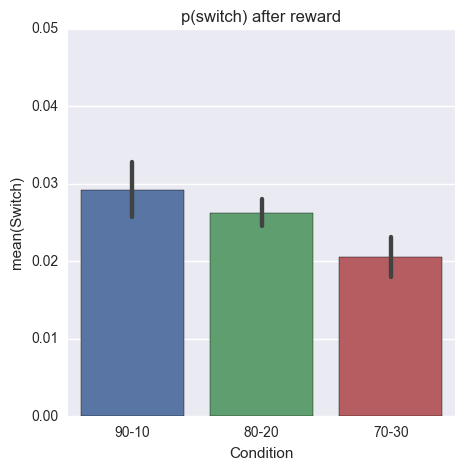

In [101]:
plt.figure(figsize=(5,5))
sns.barplot(x='Condition',y='Switch',data=data[data['1_Reward']==1],n_boot = 1000,ci=95)
plt.ylim(0,0.05)
plt.title('p(switch) after reward')

# Looking at syllables

In [102]:
data.head(5)

,Mouse ID,Session ID,Block Trial,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,10_trialDuration,9_Port,...,1_Port,1_Reward,1_ITI,1_trialDuration,0_ITI,Decision,Switch,Higher p port,Reward,Condition
0,K1,11042016_K1,11.0,9.0,-1.0,0.0,0.0,15.781,1.542,1.0,...,1.0,0.0,1.346,0.674,1.087,1.0,0.0,1.0,1.0,90-10
1,K1,11042016_K1,12.0,10.0,1.0,1.0,1.0,3.252,0.880,1.0,...,1.0,1.0,1.087,0.574,1.584,1.0,0.0,1.0,1.0,90-10
2,K1,11042016_K1,13.0,10.0,2.0,1.0,1.0,1.294,0.805,1.0,...,1.0,1.0,1.584,0.646,5.985,1.0,0.0,1.0,1.0,90-10
3,K1,11042016_K1,14.0,10.0,3.0,1.0,1.0,2.992,0.787,1.0,...,1.0,1.0,5.985,0.552,1.062,1.0,0.0,1.0,1.0,90-10
4,K1,11042016_K1,15.0,10.0,4.0,1.0,1.0,1.058,0.689,1.0,...,1.0,1.0,1.062,0.664,1.122,1.0,0.0,1.0,0.0,90-10


# Syllables (including port)

In [167]:
columns = data.columns.values
combos = []
df_combos = pd.DataFrame(data = None,index=np.arange(0,data.shape[0]),columns=['Syllable','Decision','Mouse ID','Condition'])
for row in range(data.shape[0]):
    trial = data.iloc[row]
    c = np.zeros(10)

    for j,i in enumerate(np.arange(1,11)):
        i_str = str(i) + '_'
        matching = [s for s in columns if ((i_str in s) & ((('Port') in s) or ('Reward' in s)))]

        if (np.array_equal(trial[matching].values,[0,0])):
            c[j] = -1
        elif (np.array_equal(trial[matching].values,[1,0])):
            c[j] = -2
        elif (np.array_equal(trial[matching].values,[0,1])):
            c[j] = 1
        elif (np.array_equal(trial[matching].values,[1,1])):
            c[j] = 2

    c = np.flipud(c)
    
    df_combos.iloc[row]['Syllable'] = str(c)[1:-1]
    df_combos.iloc[row]['Decision'] = trial['Decision']
    df_combos.iloc[row]['Mouse ID'] = trial['Mouse ID']
    df_combos.iloc[row]['Condition'] = trial['Condition']

# Syllables (Reward only)

In [174]:
columns = data.columns.values
combos = []
df_combos = pd.DataFrame(data = None,index=np.arange(0,data.shape[0]),columns=['Syllable','Decision','Mouse ID','Condition'])
for row in range(data.shape[0]):
    trial = data.iloc[row]
    c = np.zeros(10)

    for j,i in enumerate(np.arange(1,11)):
        i_str = str(i) + '_'
        
        matching = [s for s in columns if ((i_str in s) & ('Reward' in s))]
        
        c[j] = trial[matching].values

    c = np.flipud(c)
    
    df_combos.iloc[row]['Syllable'] = str(c)[1:-1]
    df_combos.iloc[row]['Decision'] = trial['Decision']
    df_combos.iloc[row]['Mouse ID'] = trial['Mouse ID']
    df_combos.iloc[row]['Condition'] = trial['Condition']

In [193]:
df_combos['Switch'] = data['Switch'].values

In [175]:
unique = np.unique(df_combos['Syllable'].values)

In [178]:
syllables = df_combos['Syllable'].values

In [209]:
df_combos[df_combos['Syllable'] == unique[0]]

,Syllable,Decision,Mouse ID,Condition,Switch
59,0. 0. 0. 0. 0. 0. 0. 0. 0. 0.,1,K1,90-10,0.0
4501,0. 0. 0. 0. 0. 0. 0. 0. 0. 0.,0,q40,90-10,0.0
4502,0. 0. 0. 0. 0. 0. 0. 0. 0. 0.,0,q40,90-10,0.0
4503,0. 0. 0. 0. 0. 0. 0. 0. 0. 0.,0,q40,90-10,0.0
4504,0. 0. 0. 0. 0. 0. 0. 0. 0. 0.,0,q40,90-10,0.0
4505,0. 0. 0. 0. 0. 0. 0. 0. 0. 0.,0,q40,90-10,0.0
4697,0. 0. 0. 0. 0. 0. 0. 0. 0. 0.,0,q40,90-10,0.0
4698,0. 0. 0. 0. 0. 0. 0. 0. 0. 0.,0,q40,90-10,0.0
4699,0. 0. 0. 0. 0. 0. 0. 0. 0. 0.,0,q40,90-10,0.0
4700,0. 0. 0. 0. 0. 0. 0. 0. 0. 0.,0,q40,90-10,0.0


In [211]:
u_switch = []
for u in unique:
    u_switch.append(df_combos[df_combos['Syllable'] == u]['Switch'].mean())

In [212]:
np.max(u_switch)

0.5714285714285714

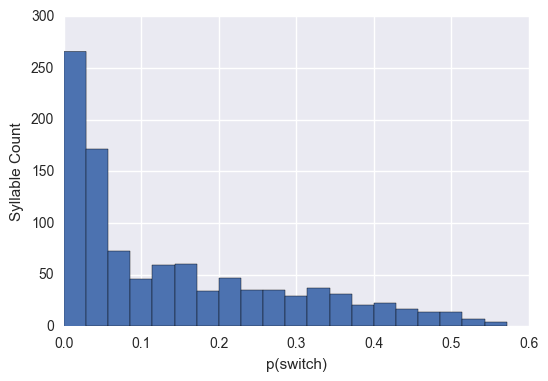

In [220]:
plt.hist(u_switch,bins=20)
plt.xlabel('p(switch)')
plt.ylabel('Syllable Count')

In [221]:
df_combos.head(5)

,Syllable,Decision,Mouse ID,Condition,Switch
0,0. 1. 1. 1. 1. 1. 1. 1. 1. 0.,1,K1,90-10,0.0
1,1. 1. 1. 1. 1. 1. 1. 1. 0. 1.,1,K1,90-10,0.0
2,1. 1. 1. 1. 1. 1. 1. 0. 1. 1.,1,K1,90-10,0.0
3,1. 1. 1. 1. 1. 1. 0. 1. 1. 1.,1,K1,90-10,0.0
4,1. 1. 1. 1. 1. 0. 1. 1. 1. 1.,1,K1,90-10,0.0


In [227]:
df_combos.to_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/syllables.csv')

In [226]:
pwd

'/Users/shayneufeld/GitHub/mouse_bandit/jupyter_notebooks/Analyzing_Behavior'